# Models training 
This notebook is used to train test and save models that are defined in the `autoencoders.py` file. 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%load_ext autoreload
%autoreload 2
plt.style.use('ggplot')
import sys 
import os
sys.path.append('/'.join(os.getcwd().split('/')[:4]))
from config.get import cfg
from tensorflow import keras
from tensorflow.keras import layers
import autoencoders

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading data

In [16]:
X_train = np.load(cfg['files']["liquid"]["raw_train_features"])
X_test  = np.load(cfg['files']["liquid"]["raw_test_features"])
print(f"shapes : X_train={X_train.shape},X_test={X_test.shape}")

shapes : X_train=(5292, 3, 600, 2),X_test=(1323, 3, 600, 2)


# Loading model
Loading a model defined in `autoencoders.py`

In [17]:
model_name,autoencoder = autoencoders.fully_connected_3L()
autoencoder.summary()
train_loss = []
test_loss = []

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3, 600, 2)]       0         
                                                                 
 reshape_4 (Reshape)         (None, 3600)              0         
                                                                 
 dense_12 (Dense)            (None, 600)               2160600   
                                                                 
 dense_13 (Dense)            (None, 100)               60100     
                                                                 
 dense_14 (Dense)            (None, 600)               60600     
                                                                 
 dense_15 (Dense)            (None, 3600)              2163600   
                                                                 
 reshape_5 (Reshape)         (None, 3, 600, 2)         0   

# Training the model

In [18]:
hist = autoencoder.fit(X_train, X_train,epochs=70,validation_data=(X_test, X_test))

# save losses
train_loss += hist.history["loss"]
test_loss  += hist.history["val_loss"]

Epoch 1/70
166/166 [==============================] - 20s 116ms/step - loss: 0.2414 - val_loss: 0.1465
Epoch 2/70
166/166 [==============================] - 19s 116ms/step - loss: 0.1333 - val_loss: 0.1170
Epoch 3/70
166/166 [==============================] - 19s 117ms/step - loss: 0.1136 - val_loss: 0.1098
Epoch 4/70
166/166 [==============================] - 19s 116ms/step - loss: 0.1072 - val_loss: 0.1008
Epoch 5/70
166/166 [==============================] - 19s 116ms/step - loss: 0.0975 - val_loss: 0.1014
Epoch 6/70
166/166 [==============================] - 19s 116ms/step - loss: 0.0984 - val_loss: 0.0933
Epoch 7/70
166/166 [==============================] - 19s 116ms/step - loss: 0.1021 - val_loss: 0.0922
Epoch 8/70
166/166 [==============================] - 19s 116ms/step - loss: 0.0894 - val_loss: 0.0874
Epoch 9/70
166/166 [==============================] - 19s 116ms/step - loss: 0.0842 - val_loss: 0.0863
Epoch 10/70
166/166 [==============================] - 19s 116ms/step - l

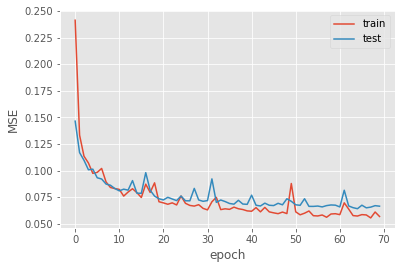

In [19]:
plt.plot(train_loss,label="train")
plt.plot(test_loss,label="test")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Saving 
We save the trained model and the recorded losses

In [21]:
autoencoder.save(cfg["models"]["autoencoder"] + f"{model_name}")
np.save(file = cfg["models"]["autoencoder"]+ f"{model_name}_train_loss", arr = np.array(train_loss))
np.save(file = cfg["models"]["autoencoder"]+ f"{model_name}_test_loss", arr = np.array(test_loss))